<a href="https://colab.research.google.com/github/neelkanthrawat/GNN-exercises/blob/main/Project/Coloured_MNIST_Data_Text_to_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np


In [19]:
# Define functions to convert digits to captions in different languages
def digit_to_english(num):
    english_numerals = {1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five', 6: 'six', 7: 'seven', 8: 'eight', 9: 'nine', 0: 'zero'}
    return english_numerals.get(num, "Invalid digit")

def digit_to_german(num):
    german_numerals = {1: 'eins', 2: 'zwei', 3: 'drei', 4: 'vier', 5: 'fünf', 6: 'sechs', 7: 'sieben', 8: 'acht', 9: 'neun', 0: 'null'}
    return german_numerals.get(num, "Ungültige Ziffer")

def digit_to_spanish(num):
    spanish_numerals = {1: 'uno', 2: 'dos', 3: 'tres', 4: 'cuatro', 5: 'cinco', 6: 'seis', 7: 'siete', 8: 'ocho', 9: 'nueve', 0: 'cero'}
    return spanish_numerals.get(num, "Dígito inválido")

def digit_to_finnish(num):
    finnish_numerals = {1: 'yksi', 2: 'kaksi', 3: 'kolme', 4: 'neljä', 5: 'viisi', 6: 'kuusi', 7: 'seitsemän', 8: 'kahdeksan', 9: 'yhdeksän', 0: 'nolla'}
    return finnish_numerals.get(num, "Virheellinen numero")

def digit_to_hindi(num):
    hindi_numerals = {1: 'एक', 2: 'दो', 3: 'तीन', 4: 'चार', 5: 'पांच', 6: 'छह', 7: 'सात', 8: 'आठ', 9: 'नौ', 0: 'शून्य'}
    return hindi_numerals.get(num, "अमान्य अंक")

In [20]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
x_train = train_dataset.data.numpy()
y_train = train_dataset.targets.numpy()

In [21]:
# Convert labels to captions in different languages
y_train_captions = {
    'english': [digit_to_english(label) for label in y_train],
    'german': [digit_to_german(label) for label in y_train],
    'spanish': [digit_to_spanish(label) for label in y_train],
    'finnish': [digit_to_finnish(label) for label in y_train],
    'hindi': [digit_to_hindi(label) for label in y_train]
}

Example of a training image with its captions in different languages:


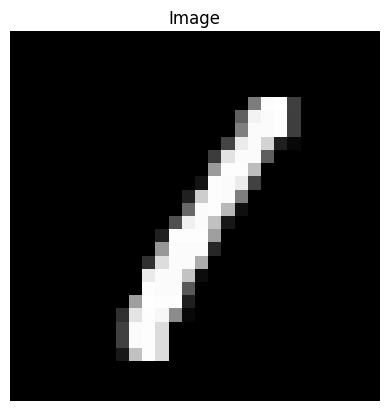

Captions:
English: one
German: eins
Spanish: uno
Finnish: yksi
Hindi: एक


In [25]:
import matplotlib.pyplot as plt

# Example of usage
index = 3  # Example index
print("Example of a training image with its captions in different languages:")

# Plot the image
plt.imshow(x_train[index], cmap='gray')
plt.title("Image")
plt.axis('off')
plt.show()

# Print the captions
print("Captions:")
print("English:", y_train_captions['english'][index])
print("German:", y_train_captions['german'][index])
print("Spanish:", y_train_captions['spanish'][index])
print("Finnish:", y_train_captions['finnish'][index])
print("Hindi:", y_train_captions['hindi'][index])


# Colored MNIST dataset:

* 0-2: coloured as red
* 3-5: coloured as green
* 6-9: coloured as blue

LET'S GENERATE COLOURED IMAGES

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

def colorize_mnist(X, y):
    colored_X = np.zeros((X.shape[0], X.shape[1], X.shape[2], 3), dtype=np.uint8)

    for i in range(X.shape[0]):
        img = X[i]
        label = y[i]

        # Set color based on label range
        if label <= 2:
            color = [255, 0, 0]  # Red
        elif label <= 5:
            color = [0, 255, 0]  # Green
        else:
            color = [0, 0, 255]  # Blue

        # Colorize the digits while keeping the background unchanged
        colored_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
        colored_img[img > 0] = color
        colored_X[i] = colored_img

    return colored_X

# Load the original MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Colorize the MNIST dataset
colored_X_train = colorize_mnist(X_train, y_train)
colored_X_test = colorize_mnist(X_test, y_test)

### Final code for generating the colored MNIST dataset and corresponding captions in different languages:

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist

# Define color names in different languages
color_names = {
    "English": {"Red": "Red", "Green": "Green", "Blue": "Blue"},
    "German": {"Red": "Rot", "Green": "Grün", "Blue": "Blau"},
    "Spanish": {"Red": "Rojo", "Green": "Verde", "Blue": "Azul"},
    "Finnish": {"Red": "Punainen", "Green": "Vihreä", "Blue": "Sininen"}
}

# Define functions to convert digits to captions in different languages
def digit_to_english(num, color_name):
    english_numerals = {1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five', 6: 'six', 7: 'seven', 8: 'eight', 9: 'nine', 0: 'zero'}
    return f"{color_names['English'][color_name]} {english_numerals.get(num, 'Invalid digit')}"

def digit_to_german(num, color_name):
    german_numerals = {1: 'eins', 2: 'zwei', 3: 'drei', 4: 'vier', 5: 'fünf', 6: 'sechs', 7: 'sieben', 8: 'acht', 9: 'neun', 0: 'null'}
    return f"{color_names['German'][color_name]} {german_numerals.get(num, 'Ungültige Ziffer')}"

def digit_to_spanish(num, color_name):
    spanish_numerals = {1: 'uno', 2: 'dos', 3: 'tres', 4: 'cuatro', 5: 'cinco', 6: 'seis', 7: 'siete', 8: 'ocho', 9: 'nueve', 0: 'cero'}
    return f"{color_names['Spanish'][color_name]} {spanish_numerals.get(num, 'Dígito inválido')}"

def digit_to_finnish(num, color_name):
    finnish_numerals = {1: 'yksi', 2: 'kaksi', 3: 'kolme', 4: 'neljä', 5: 'viisi', 6: 'kuusi', 7: 'seitsemän', 8: 'kahdeksan', 9: 'yhdeksän', 0: 'nolla'}
    return f"{color_names['Finnish'][color_name]} {finnish_numerals.get(num, 'Virheellinen numero')}"

# Function to generate captions in different languages for a given digit and color
def generate_captions(num, color_name):
    captions = {
        "English": digit_to_english(num, color_name),
        "German": digit_to_german(num, color_name),
        "Spanish": digit_to_spanish(num, color_name),
        "Finnish": digit_to_finnish(num, color_name)
    }
    return captions

# Function to colorize MNIST dataset
def colorize_mnist(X, y):
    colored_X = np.zeros((X.shape[0], X.shape[1], X.shape[2], 3), dtype=np.uint8)

    for i in range(X.shape[0]):
        img = X[i]
        label = y[i]

        # Set color based on label range
        if label <= 2:
            color_name = "Red"
            color = [255, 0, 0]  # Red
        elif label <= 5:
            color_name = "Green"
            color = [0, 255, 0]  # Green
        else:
            color_name = "Blue"
            color = [0, 0, 255]  # Blue

        # Colorize the digits while keeping the background unchanged
        colored_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
        colored_img[img > 0] = color
        colored_X[i] = colored_img

    return colored_X

In [110]:
# Load the original MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Split the data into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Colorize the datasets
colored_X_train = colorize_mnist(X_train, y_train)
colored_X_val = colorize_mnist(X_val, y_val)
colored_X_test = colorize_mnist(X_test, y_test)

In [109]:
# Generate captions for each dataset
captions_train = []
captions_val = []
captions_test = []

for i in range(len(y_train)):
    label = y_train[i]
    if label <= 2:
        color_name = "Red"
    elif label <= 5:
        color_name = "Green"
    else:
        color_name = "Blue"
    captions_train.append(generate_captions(label, color_name))

for i in range(len(y_val)):
    label = y_val[i]
    if label <= 2:
        color_name = "Red"
    elif label <= 5:
        color_name = "Green"
    else:
        color_name = "Blue"
    captions_val.append(generate_captions(label, color_name))

for i in range(len(y_test)):
    label = y_test[i]
    if label <= 2:
        color_name = "Red"
    elif label <= 5:
        color_name = "Green"
    else:
        color_name = "Blue"
    captions_test.append(generate_captions(label, color_name))

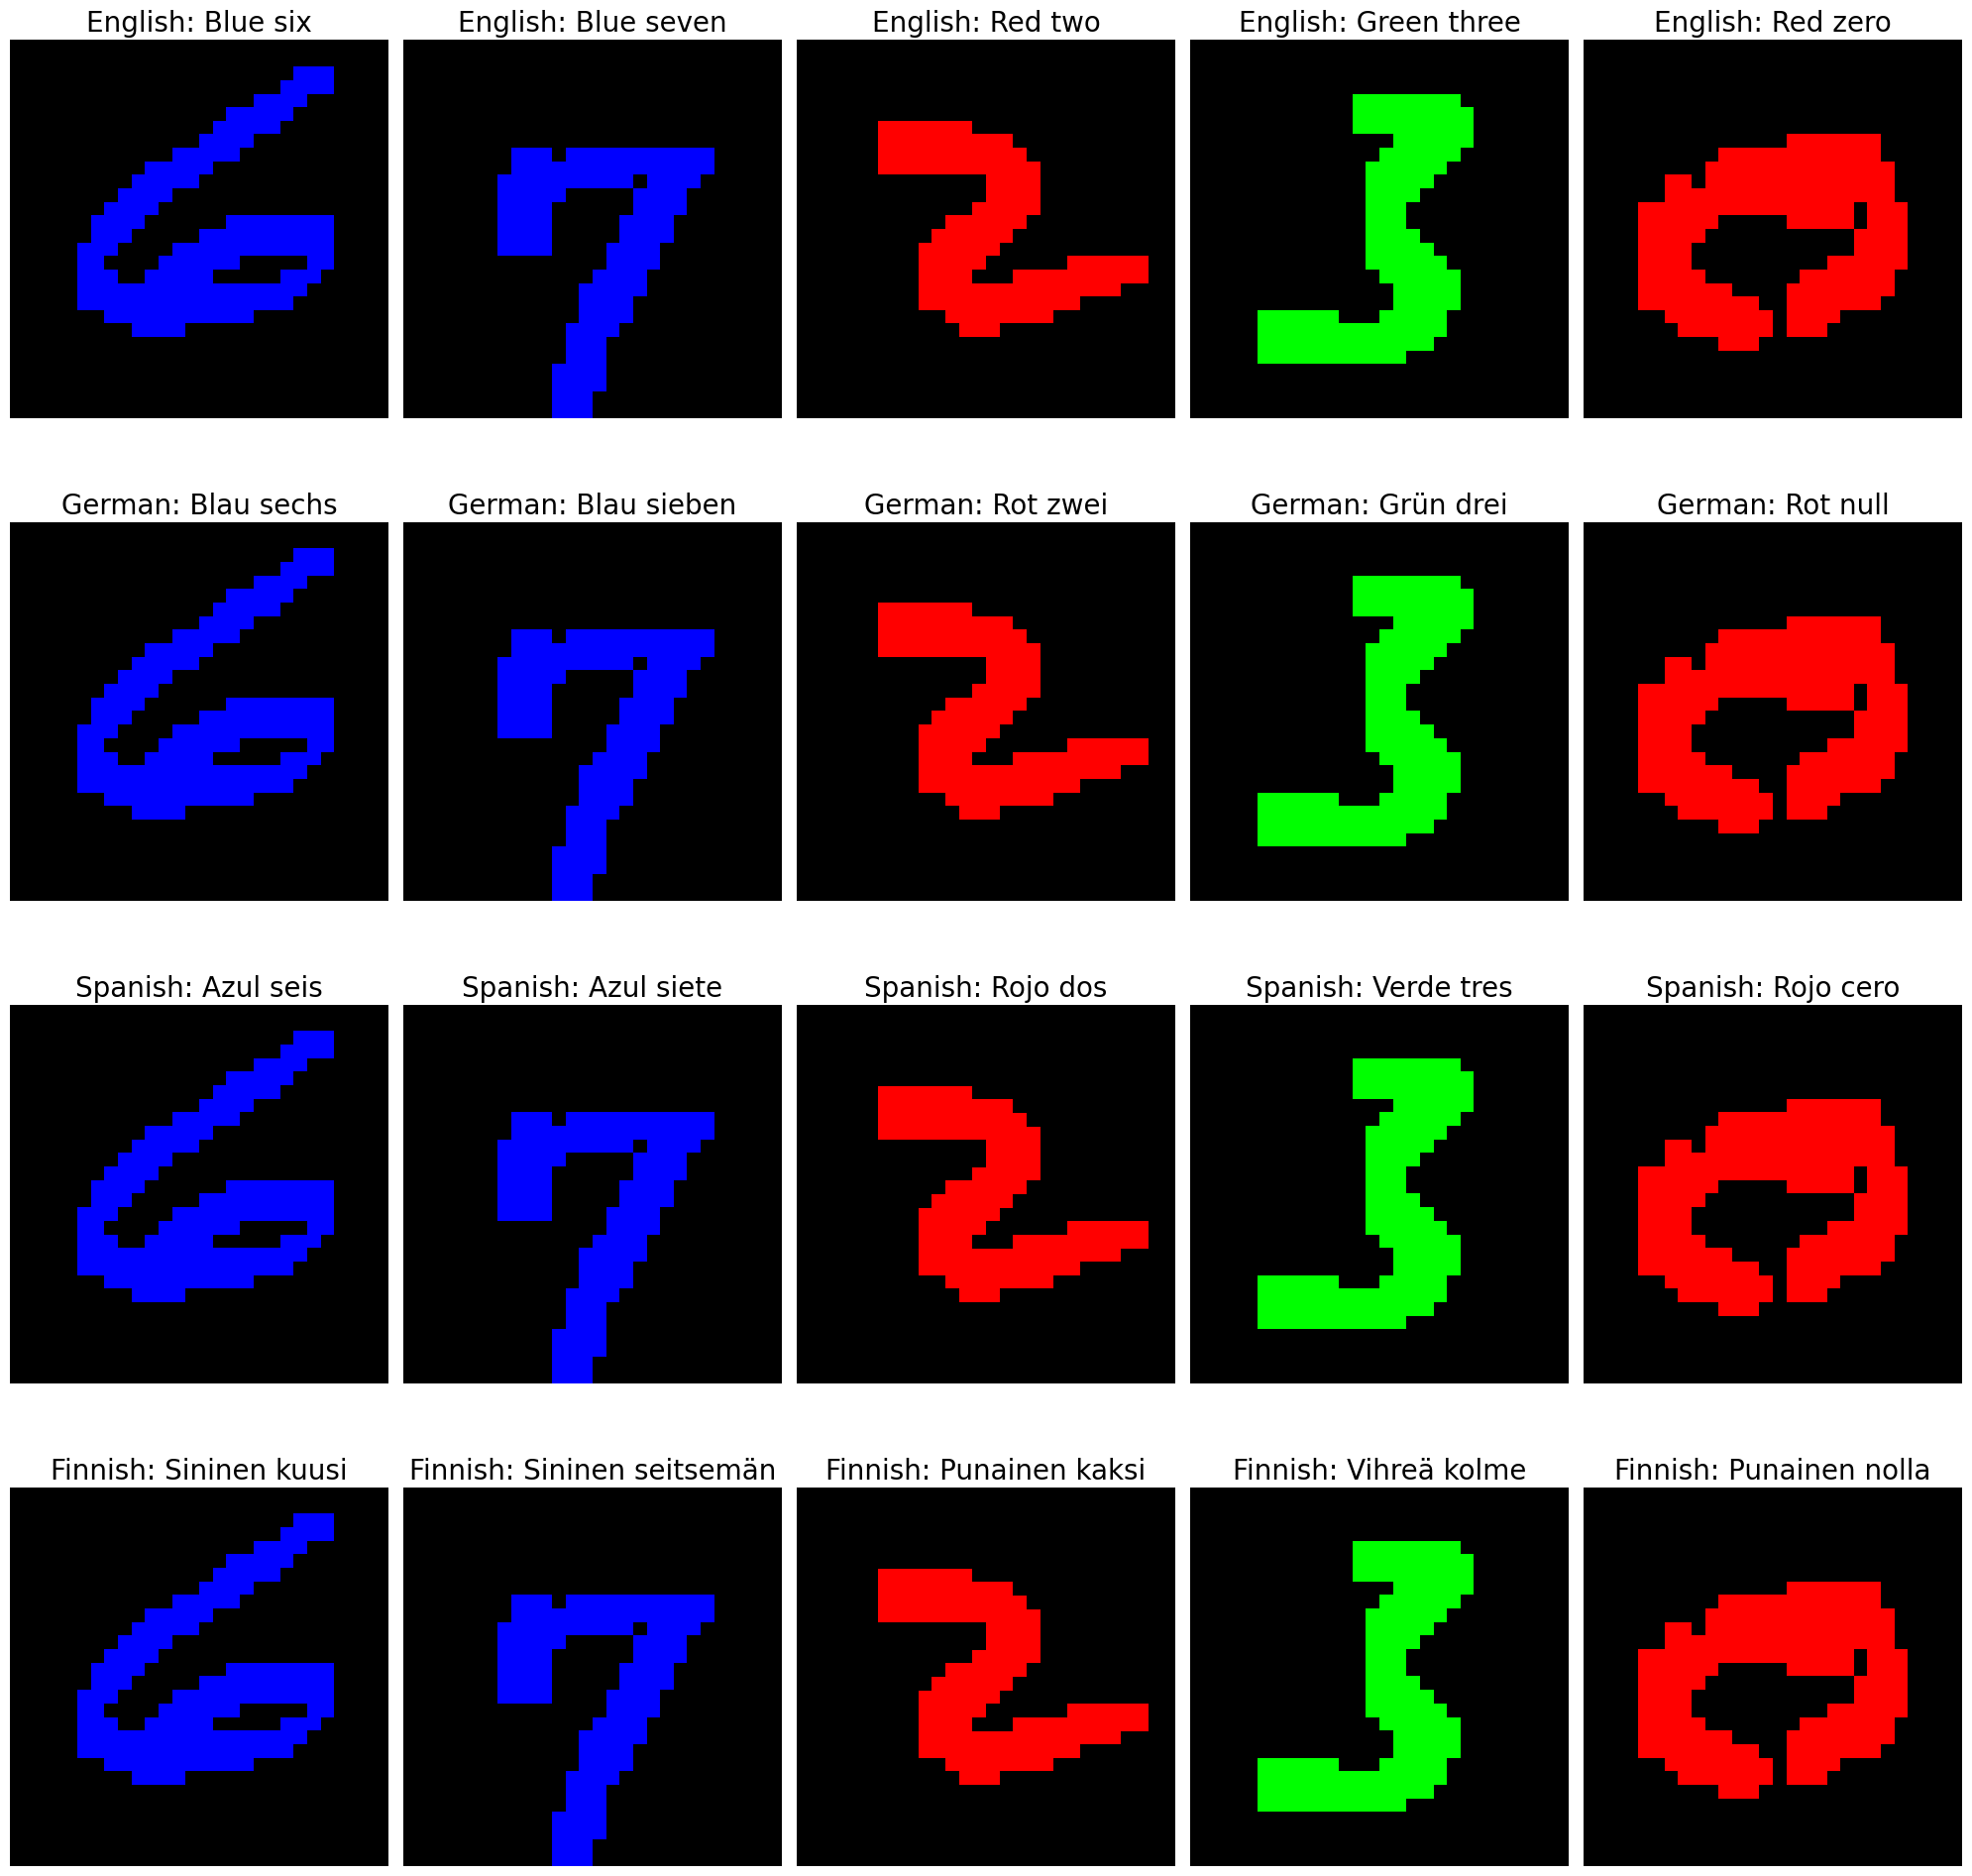

In [119]:
# Visualize some examples with all captions
import numpy as np

# Visualize some examples with all captions
num_examples = 5
num_languages = 4
# Generate random indices
random_indices = np.random.choice(len(colored_X_train), size=num_examples, replace=False)
fig, axes = plt.subplots(num_languages, num_examples, figsize=(20, 20))

for i, idx in enumerate(random_indices):
    for j, (lang, caption) in enumerate(captions_train[idx].items()):
        axes[j, i].imshow(colored_X_train[idx])
        axes[j, i].set_title(f'{lang}: {caption}', fontsize=20)  # Adjust fontsize here
        axes[j, i].axis('off')

plt.tight_layout()
plt.show()
